# What percentage of total purchases are made by women and men, and which car brands are predominantly purchased by each gender?

In [13]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt 

# Loading and transforming data
df = pd.read_csv('/Users/abay/Downloads/Car Sales.xlsx - car_data.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.head()


,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,2022-01-02,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,2022-01-02,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,2022-01-02,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,2022-01-02,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,2022-01-02,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


# What percentage of the total purchases are made by women and men, respectively?

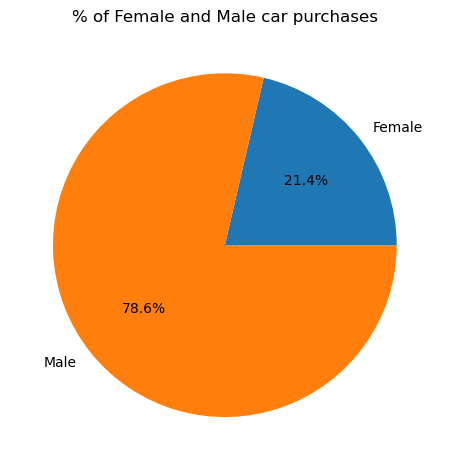

In [28]:
df_group = df.groupby('Gender')['Car_id'].agg('size')

#plotting
df_group.plot(kind='pie',startangle = 0, autopct = '%1.1f%%') 
# 'autopct='%1.1f%%': Displays the percentage value on each slice of the pie with one decimal place.
# startangle=0: Rotates the chart so that the first slice starts at 0 degrees (the top of the pie).
plt.ylabel('')
plt.title('% of Female and Male car purchases')

plt.tight_layout()
plt.show()

***The pie chart illustrates the percentage distribution of car purchases between female and male buyers. It shows that male buyers account for a significant majority, making up 78.6% of the total purchases, while female buyers represent 21.4%. This indicates that men are the dominant consumers in car purchases within this dataset, potentially pointing to gender-based preferences or purchasing power differences in the automotive market.***

# Which car brands are predominantly purchased by women and men?

Female:

In [38]:
df_female = df.groupby(['Gender', 'Company'])['Car_id'].agg('size').loc['Female']

#sorting values and showing the top 10 most popular brends
df_female = df_female.sort_values(ascending=False).head(10)
df_female

Company
Chevrolet     388
Ford          367
Dodge         344
Mercedes-B    292
Volkswagen    289
Mitsubishi    269
Chrysler      246
Toyota        222
Oldsmobile    218
Nissan        208
Name: Car_id, dtype: int64

Male

In [39]:
df_male = df.groupby(['Gender', 'Company'])['Car_id'].agg('size').loc['Male']

#sorting values and showing the top 10 most popular brends
df_male = df_male.sort_values(ascending=False).head(10)
df_male 

Company
Chevrolet     1431
Dodge         1327
Ford          1247
Volkswagen    1044
Mitsubishi    1008
Mercedes-B     993
Oldsmobile     893
Toyota         888
Chrysler       874
Mercury        715
Name: Car_id, dtype: int64

Plotting

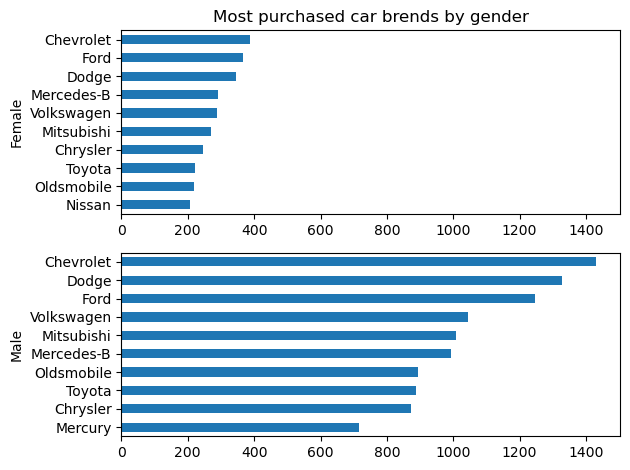

In [70]:
fig, ax = plt.subplots(2,1)

df_female.plot(kind='barh', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_ylabel('Female')
ax[0].set_title('Most purchased car brends by gender')

df_male.plot(kind='barh', ax=ax[1])
ax[1].invert_yaxis()
ax[1].set_ylabel('Male')

ax[0].set_xlim(ax[1].get_xlim()) # so that the two graphs are at the same length along the x axis (чтобы два графика находились на одногй длине по оси х)

plt.tight_layout()
plt.show()

***The analysis of car brands purchased by gender reveals distinct preferences. Chevrolet, Ford, and Dodge are the top three car brands for both men and women. However, men tend to buy more cars overall across all brands, with Chevrolet being the most popular among them. Women show a slightly more diversified choice of brands, but the volume of purchases is consistently lower than that of men. This indicates that while there are common favorites between the genders, men generally purchase more vehicles than women in each of the top brands.***